In [60]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
data = pd.read_excel("/content/IPEDS_data.xlsx")

In [62]:
data.head()

ID number                                 Name  year    ZIP code  \
0     100654             Alabama A & M University  2013       35762   
1     100663  University of Alabama at Birmingham  2013  35294-0110   
2     100690                   Amridge University  2013  36117-3553   
3     100706  University of Alabama in Huntsville  2013       35899   
4     100724             Alabama State University  2013  36104-0271   

                              Highest degree offered        County name  \
0             Doctor's degree - research/scholarship     Madison County   
1  Doctor's degree - research/scholarship and pro...   Jefferson County   
2  Doctor's degree - research/scholarship and pro...  Montgomery County   
3  Doctor's degree - research/scholarship and pro...     Madison County   
4  Doctor's degree - research/scholarship and pro...  Montgomery County   

   Longitude location of institution  Latitude location of institution  \
0                         -86.568502                         34.783368   
1                         -86.809170                         33.502230   
2                         -86.174010                         32.362609   
3                         -86.638420                         34.722818   
4                         -86.295677                         32.364317   

  Religious affiliation Offers Less than one year certificate  ...  \
0        Not applicable                            Implied no  ...   
1        Not applicable                            Implied no  ...   
2    Churches of Christ                            Implied no  ...   
3        Not applicable                                   Yes  ...   
4        Not applicable                            Implied no  ...   

  Percent of freshmen  receiving federal grant aid  \
0                                             81.0   
1                                             36.0   
2                                             90.0   
3                                             31.0   
4                                             76.0   

  Percent of freshmen receiving Pell grants  \
0                                      81.0   
1                                      36.0   
2                                      90.0   
3                                      31.0   
4                                      76.0   

  Percent of freshmen receiving other federal grant aid  \
0                                                7.0      
1                                               10.0      
2                                                0.0      
3                                                4.0      
4                                               13.0      

  Percent of freshmen receiving state/local grant aid  \
0                                                1.0    
1                                                0.0    
2                                               40.0    
3                                                1.0    
4                                               11.0    

  Percent of freshmen receiving institutional grant aid  \
0                                               32.0      
1                                               60.0      
2                                               90.0      
3                                               63.0      
4                                               34.0      

  Percent of freshmen receiving student loan aid  \
0                                           89.0   
1                                           56.0   
2                                          100.0   
3                                           46.0   
4                                           81.0   

  Percent of freshmen receiving federal student loans  \
0                                               89.0    
1                                               55.0    
2                                              100.0    
3                                               46.0    


In [63]:
data.isna().sum()

ID number                                                   0
Name                                                        0
year                                                        0
ZIP code                                                    0
Highest degree offered                                      0
                                                         ... 
Percent of freshmen receiving student loan aid             42
Percent of freshmen receiving federal student loans        42
Percent of freshmen receiving other loan aid               42
Endowment assets (year end) per FTE enrollment (GASB)    1018
Endowment assets (year end) per FTE enrollment (FASB)     574
Length: 145, dtype: int64

In [64]:
data.duplicated().sum()

0

In [65]:
dublicated = data.nunique()==1

In [66]:
columns = dublicated[dublicated].index.tolist()
print("Columns with only one unique value:", columns)

Columns with only one unique value: ['year', 'Level of institution', 'Tribal college']


In [67]:
data.value_counts()

Series([], Name: count, dtype: int64)

In [68]:
for i in data.columns:
    print(data[i].value_counts())
    print("**********************************")

ID number
100654    1
206835    1
207351    1
207324    1
207306    1
         ..
163453    1
163338    1
163286    1
163268    1
456490    1
Name: count, Length: 1534, dtype: int64
**********************************
Name
Westminster College                              3
Union College                                    3
Columbia College                                 2
University of St Thomas                          2
Bethel University                                2
                                                ..
University of Maryland-College Park              1
University of Maryland-Baltimore County          1
University of Maryland-University College        1
Loyola University Maryland                       1
Polytechnic University of Puerto Rico-Orlando    1
Name: count, Length: 1517, dtype: int64
**********************************
year
2013    1534
Name: count, dtype: int64
**********************************
ZIP code
5401          2
10027         2
10010         2
46556 

**cleaning data**

In [69]:
droped_columns=['year','ID number','ZIP code','Longitude location of institution','Latitude location of institution','Level of institution','Tribal college','Endowment assets (year end) per FTE enrollment (FASB)']

In [70]:
data.drop(columns=droped_columns ,inplace=True )

In [115]:
sumofstudents = [i for i in data.columns if 'Estimated enrollment' in i and 'total' in i.lower()]

**calculate all students**

In [116]:
data['all students']= data[sumofstudents].sum(axis=1)

In [117]:
print(data['all students'])

0        5024.0
1       18568.0
2         626.0
3        7376.0
4        6076.0
         ...   
1529     1889.0
1530      504.0
1531      445.0
1532       68.0
1533      128.0
Name: all students, Length: 1534, dtype: float64


we need to know if we replace it by the main or median so need to see the distribution

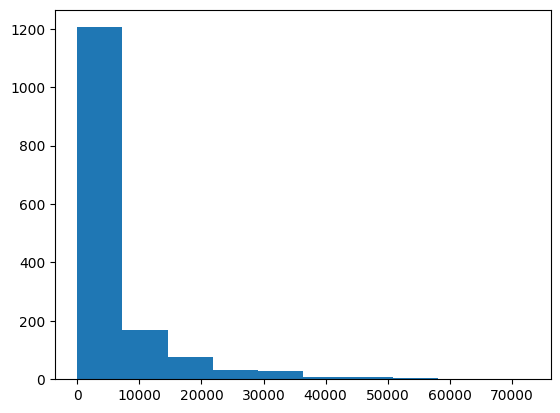

In [118]:
plt.hist(data['Applicants total'])
plt.show()

In [75]:
data['Applicants total']=data['Applicants total'].fillna(data['Applicants total'].median())

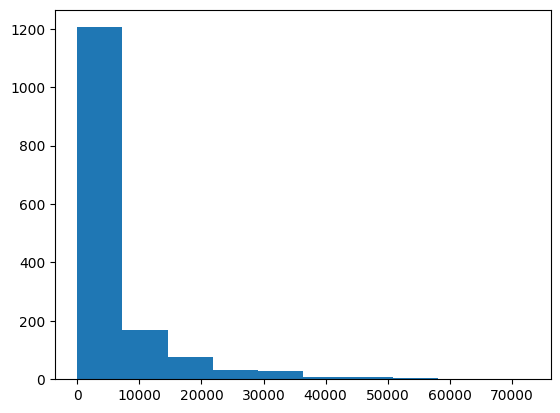

In [76]:
plt.hist(data['Applicants total'])
plt.show()

***1.     
Do
universities with a high number of applications are the preferred ones by students?
in other words, could the number of applications tell us that a university is
one of the most preferred by students?***

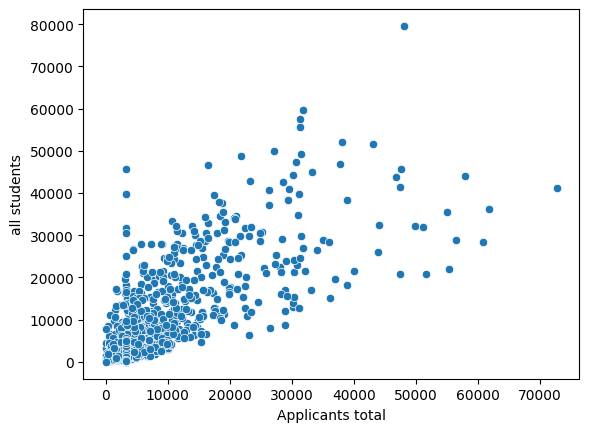

In [119]:
sns.scatterplot(data= data ,x=data['Applicants total'],y= data['all students']);

'''so if we take all students it will be arelationship between the and the applications'''

now we will study the relation between every kind of student and the applications

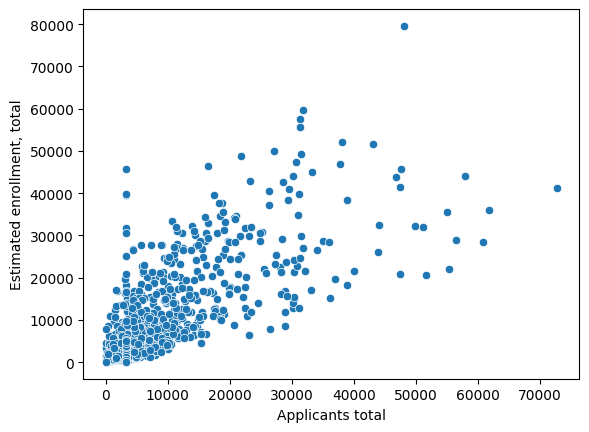

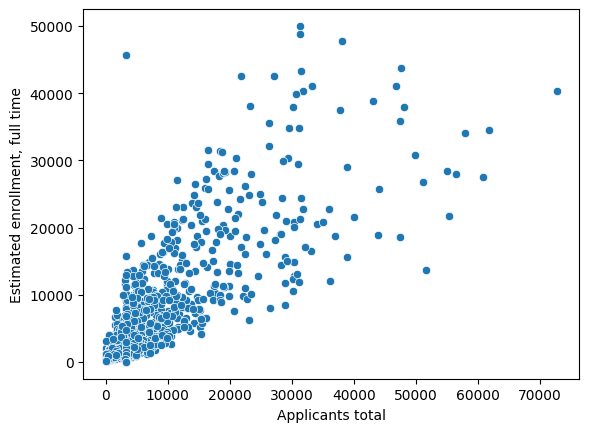

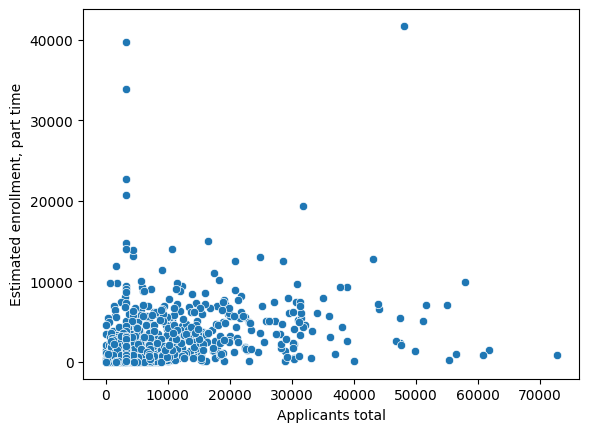

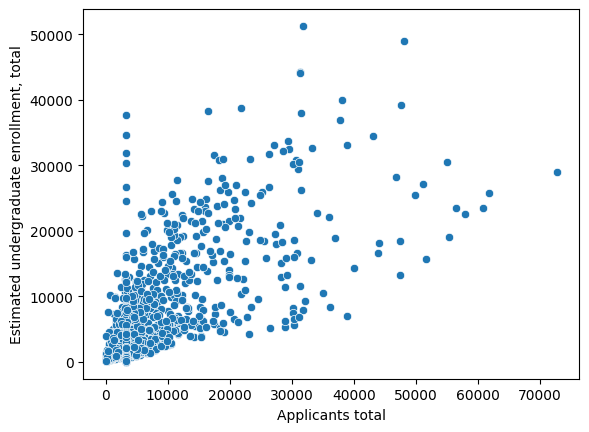

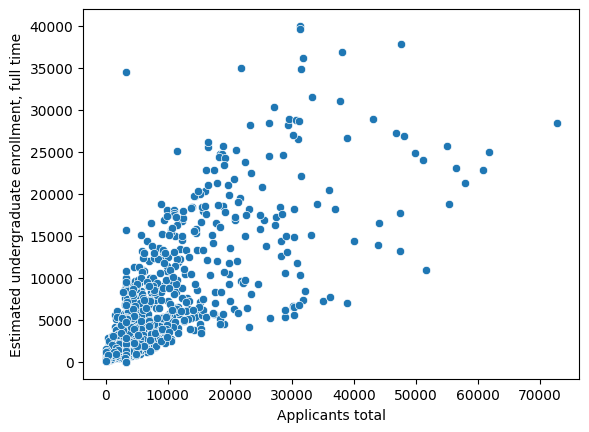

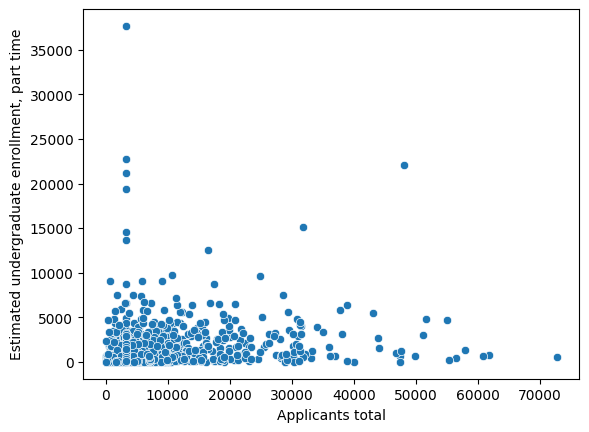

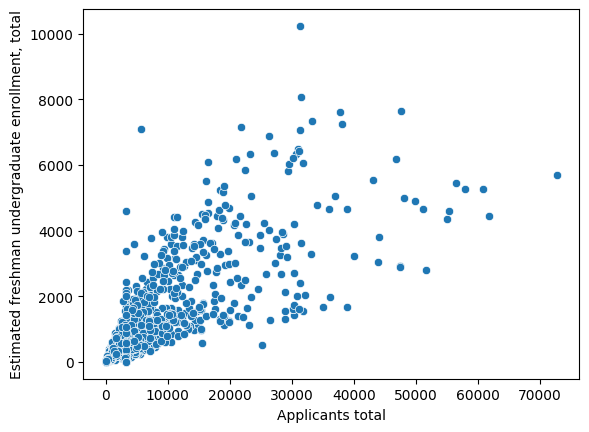

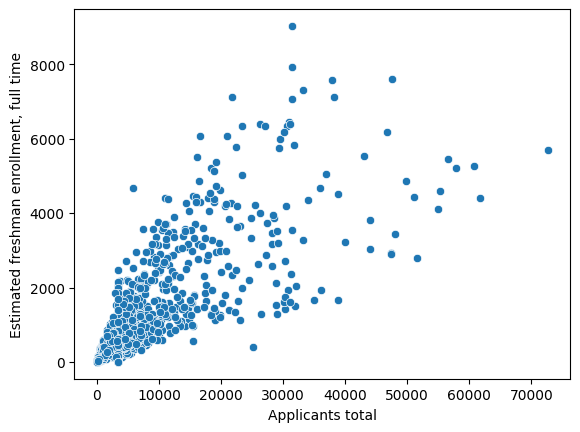

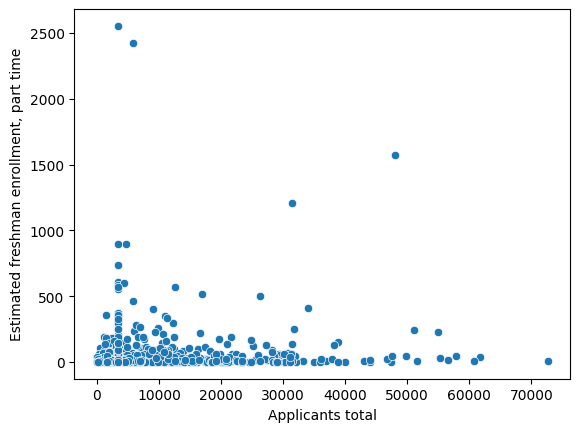

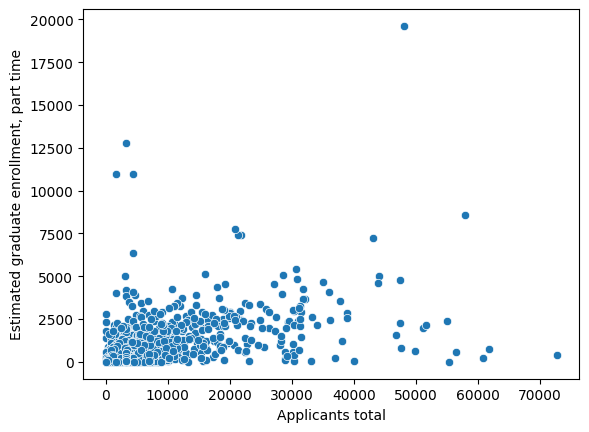

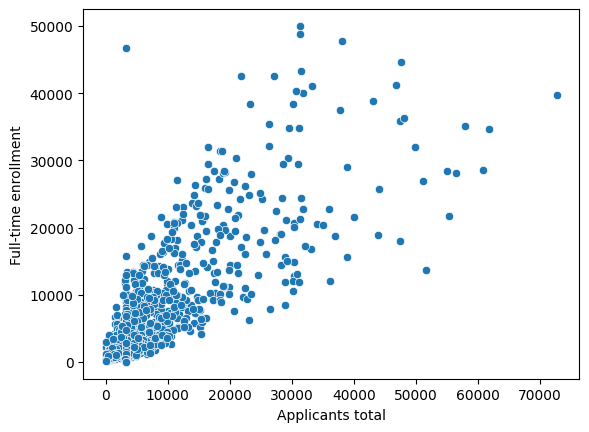

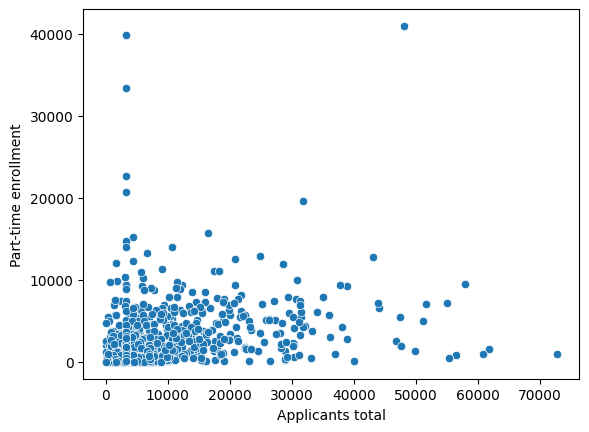

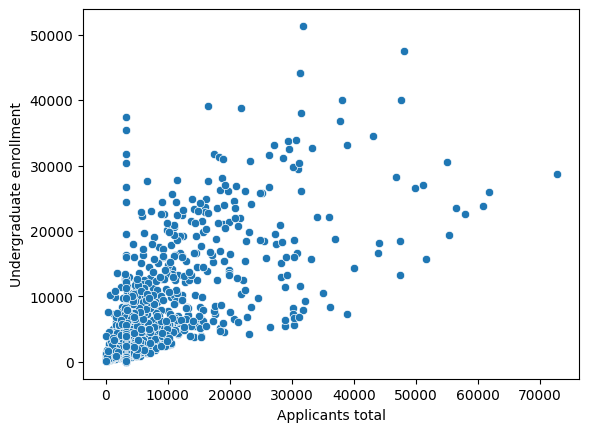

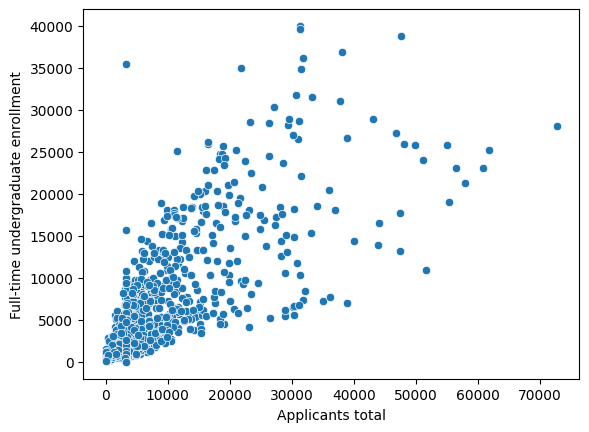

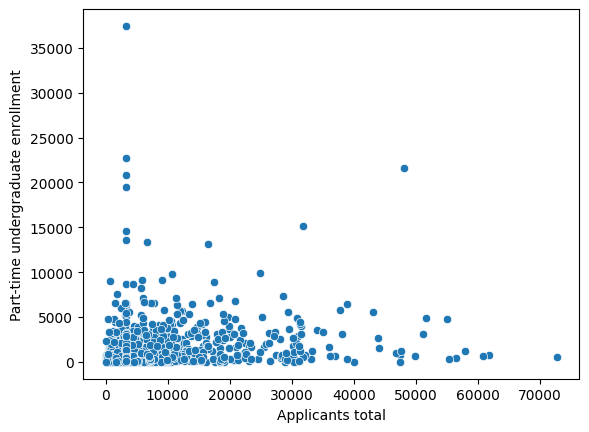

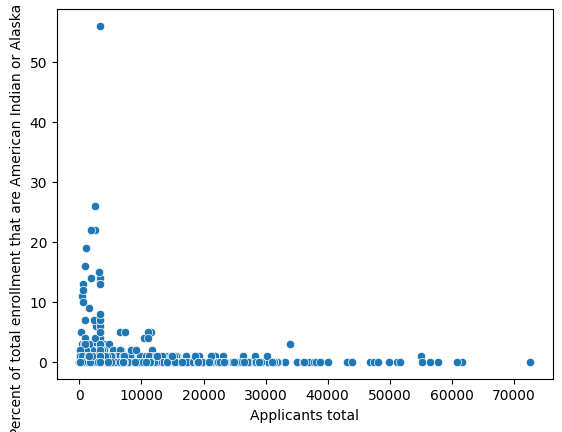

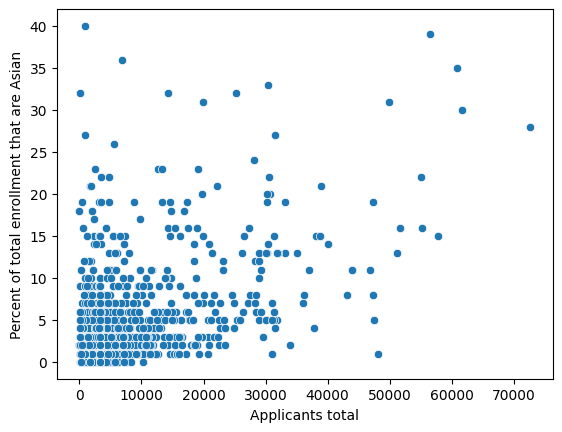

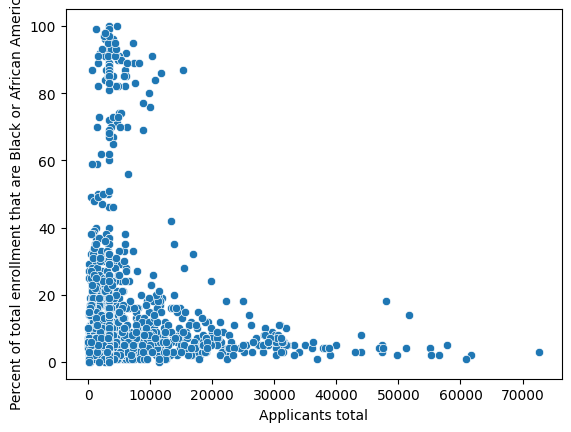

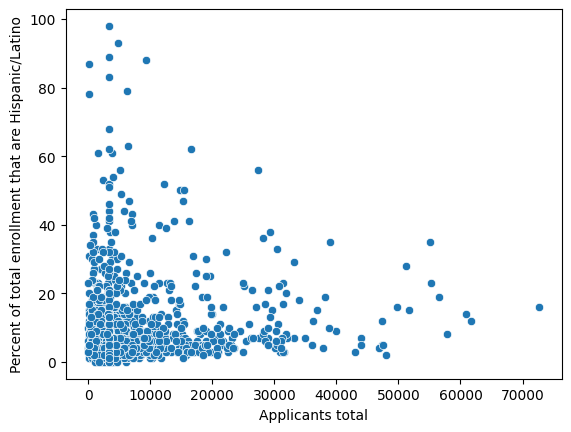

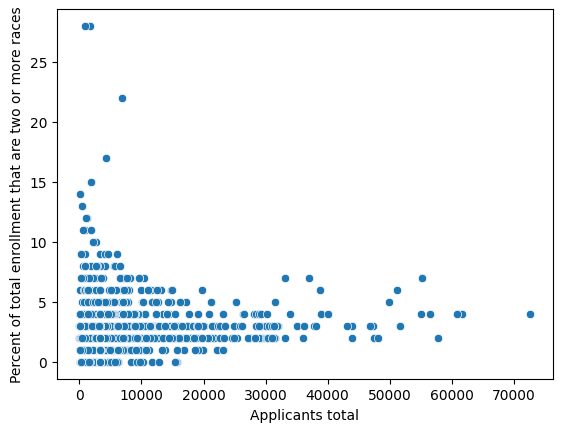

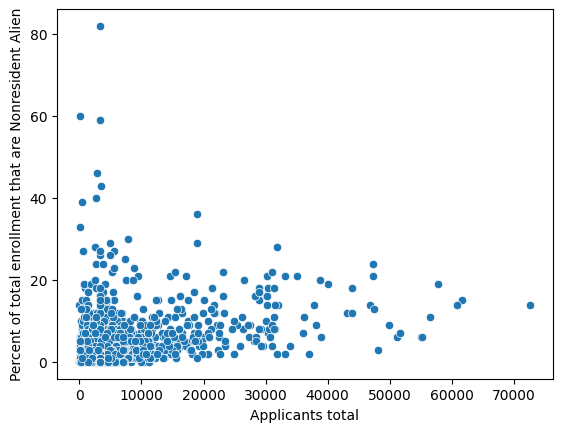

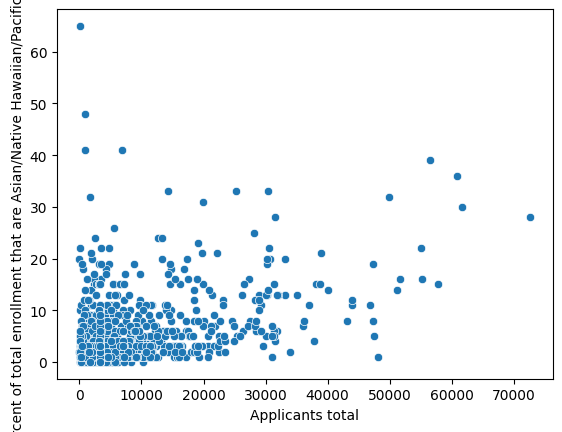

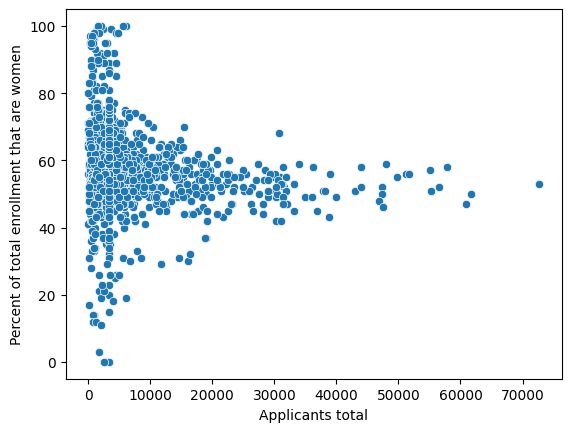

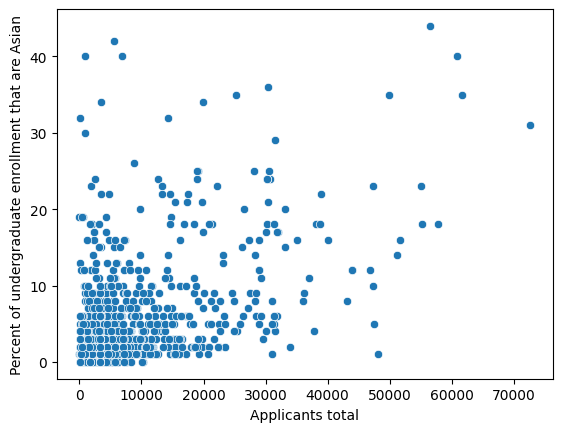

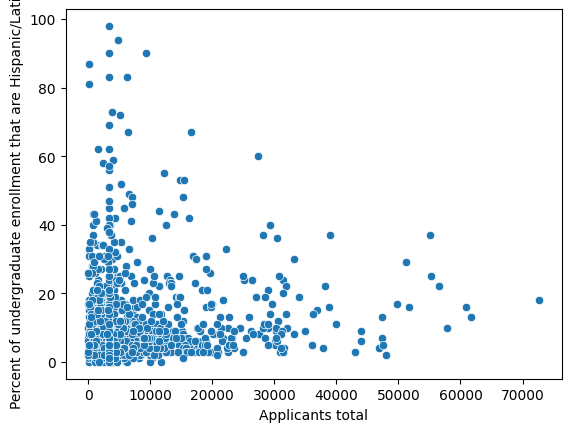

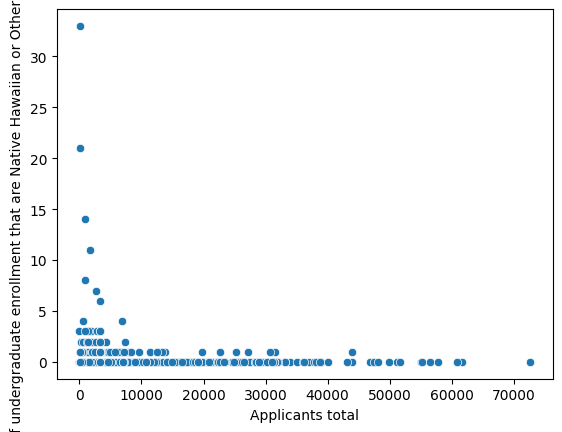

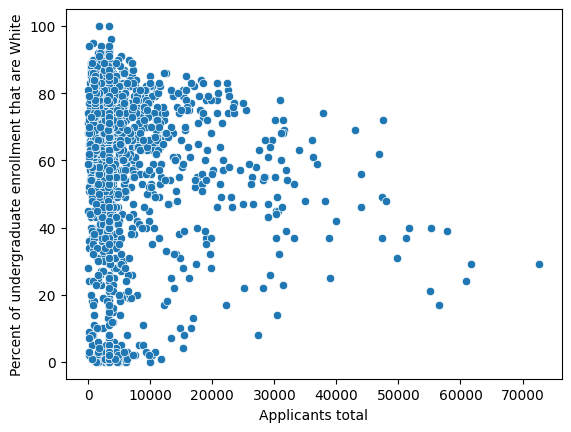

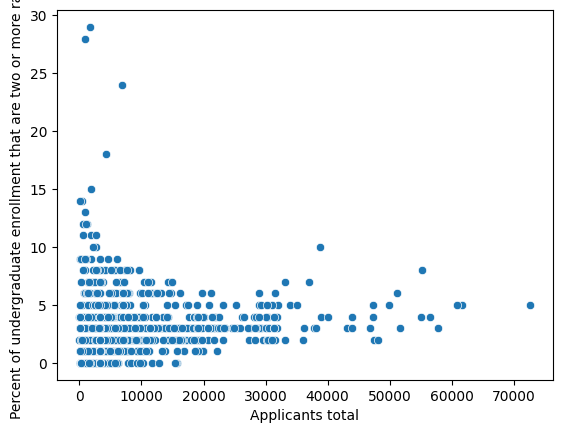

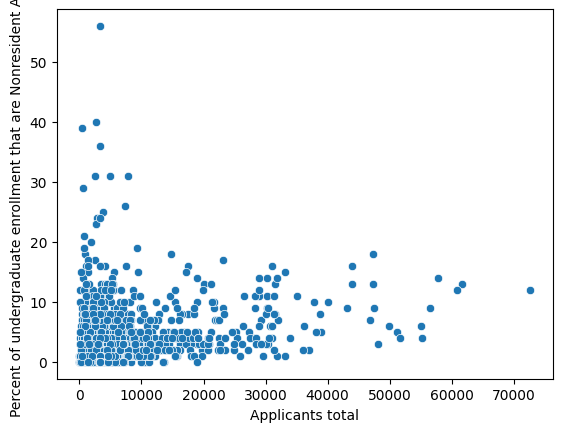

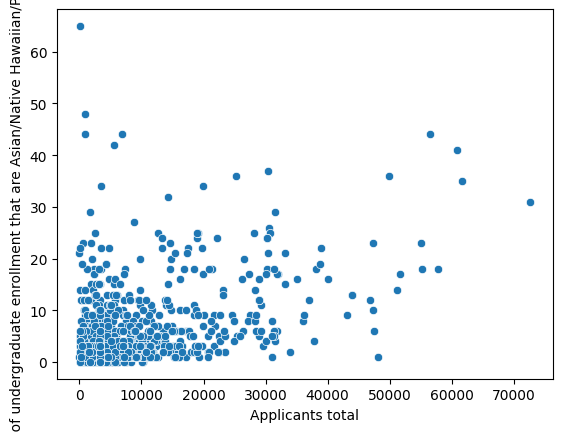

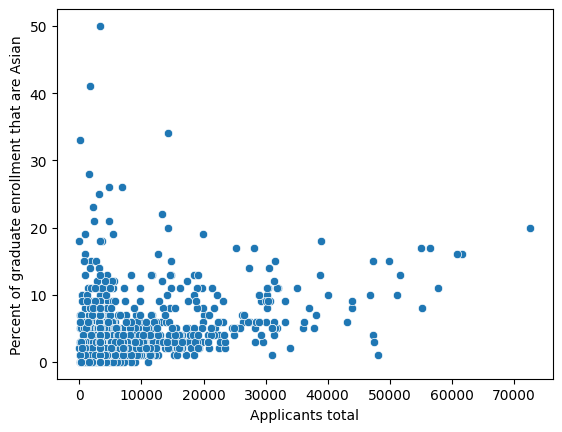

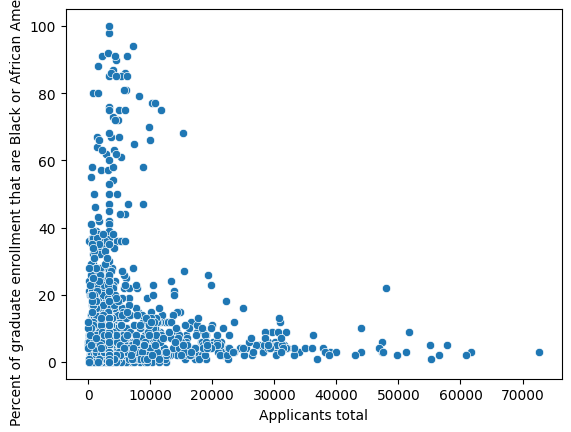

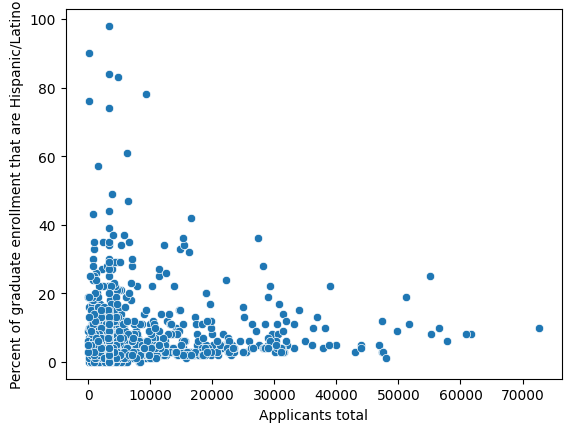

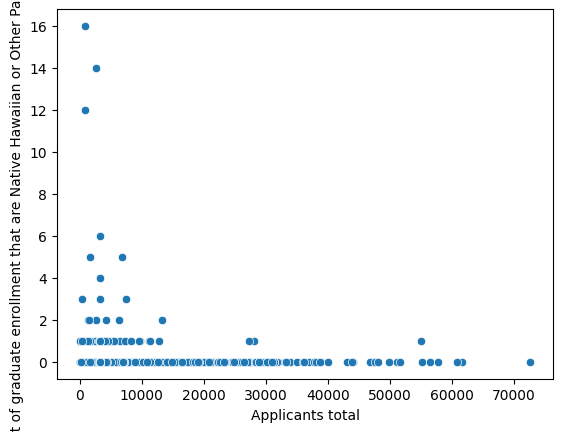

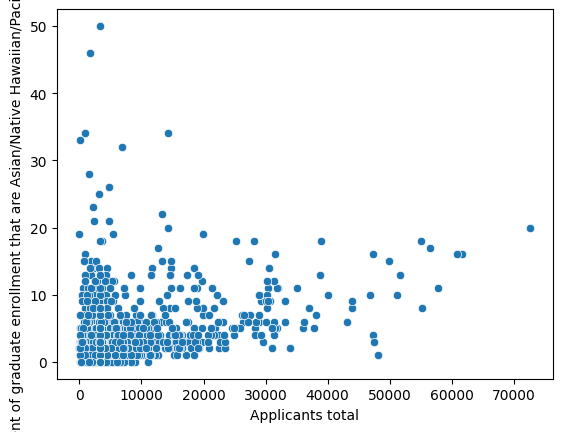

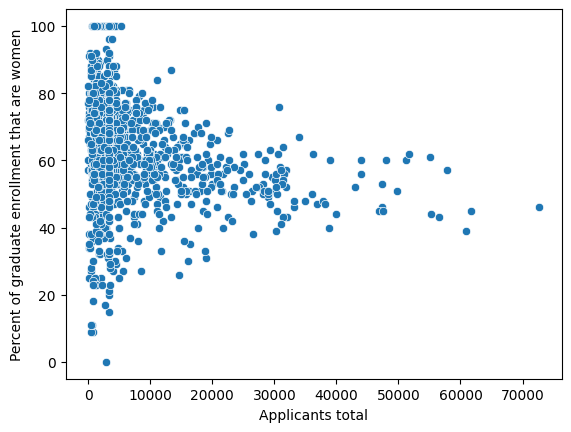

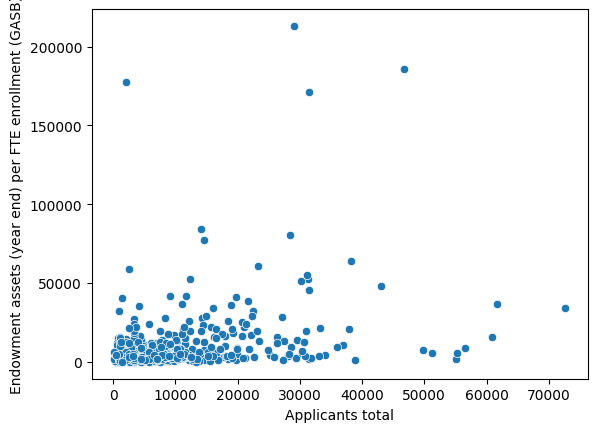

In [78]:
for i in data.columns :
    if 'enrollment' in i.lower():
        sns.scatterplot(data= data ,x=data['Applicants total'],y= data[i])
        plt.show()


***Do
students prefer universities that have a high rate of admission?, in other
words, do students prefer a university where it is easier for them to be
admitted?***

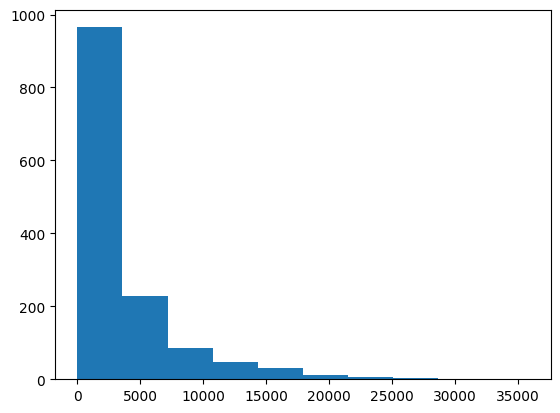

2056.0


In [79]:
plt.hist(data['Admissions total'])
plt.show()
print (data['Admissions total'].median())

In [80]:
data['Admissions total'].isna().sum()

157

In [81]:
data['Admissions total']=data['Admissions total'].fillna(data['Admissions total'].median())

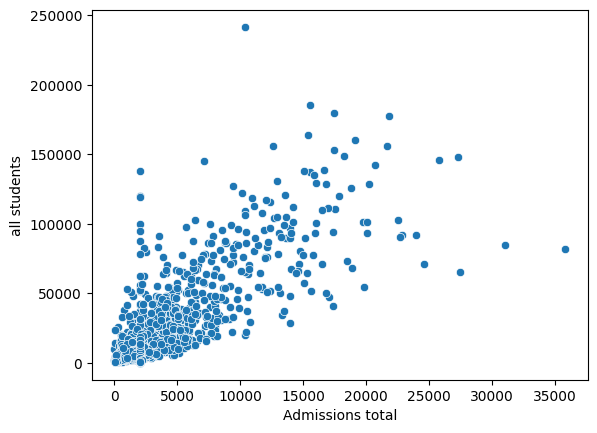

In [82]:
sns.scatterplot(data= data , x= data['Admissions total'] , y= data['all students'])
plt.show()

so we can see the relation between the students and the admission as a linear correlation but in the heightest admission it dosent follow the rules

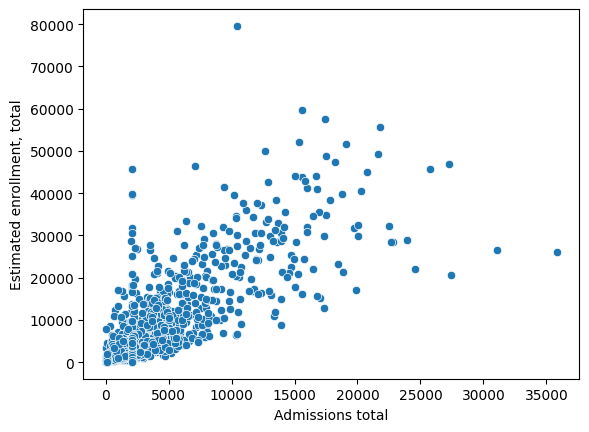

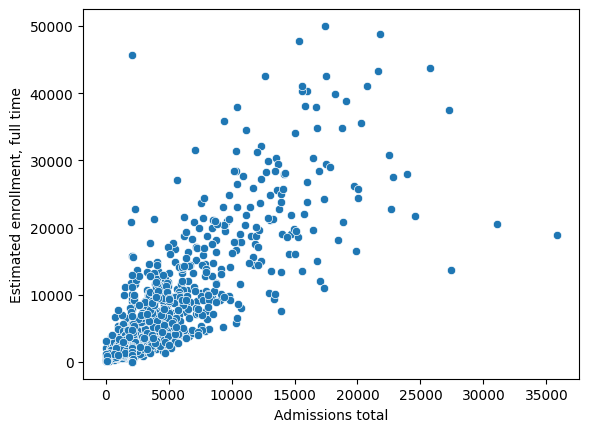

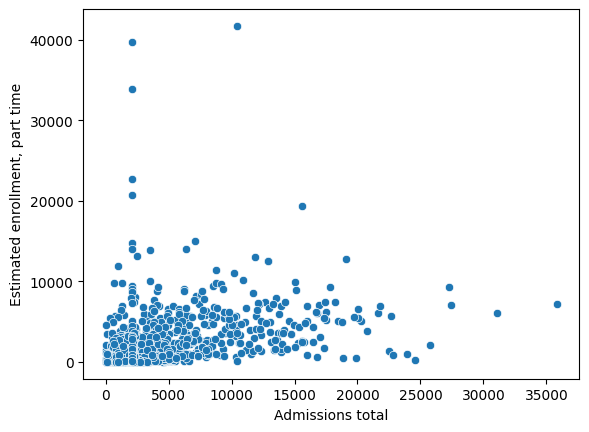

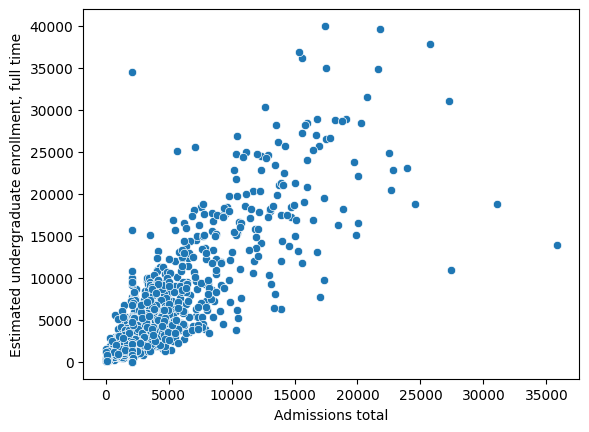

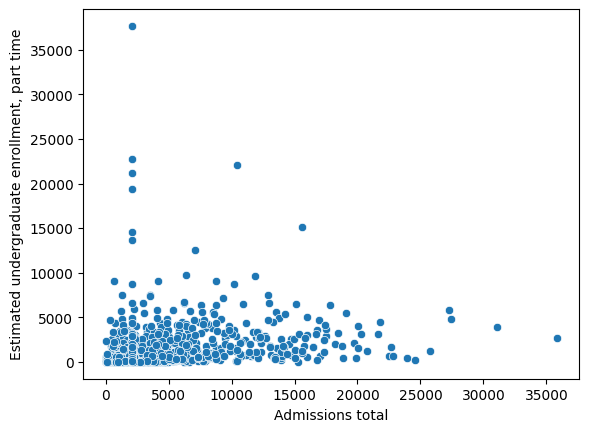

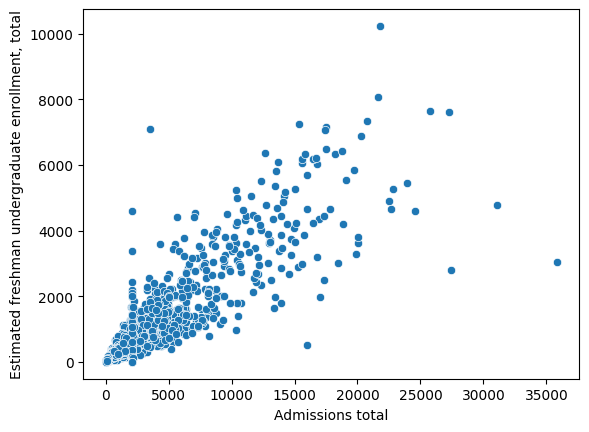

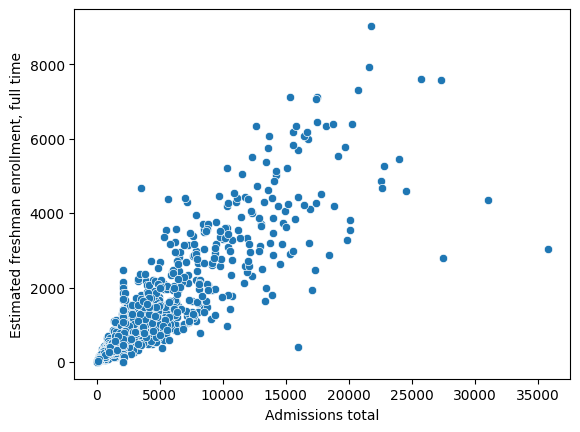

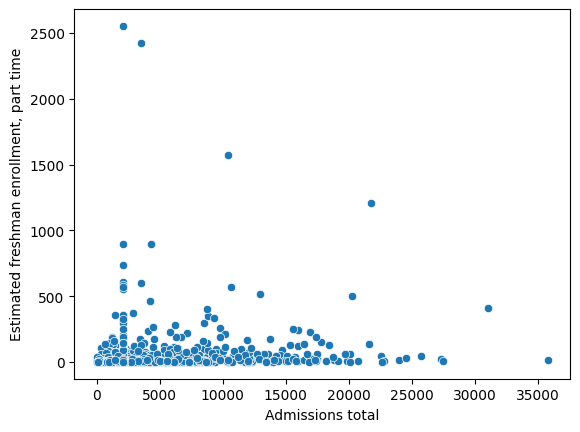

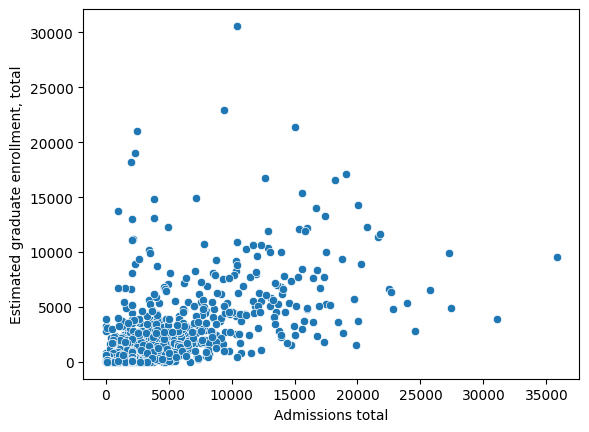

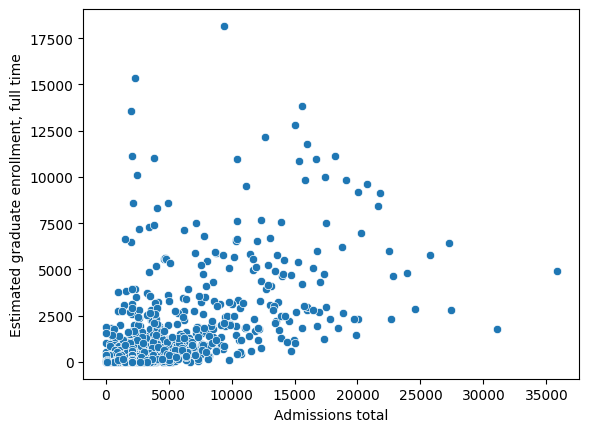

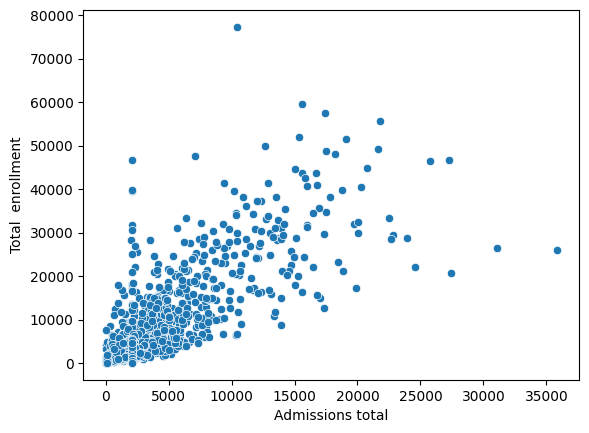

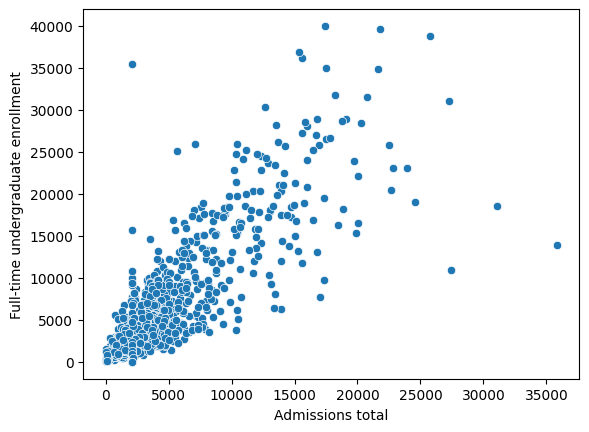

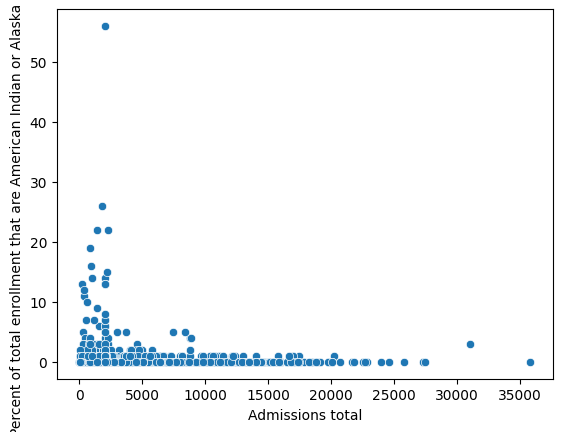

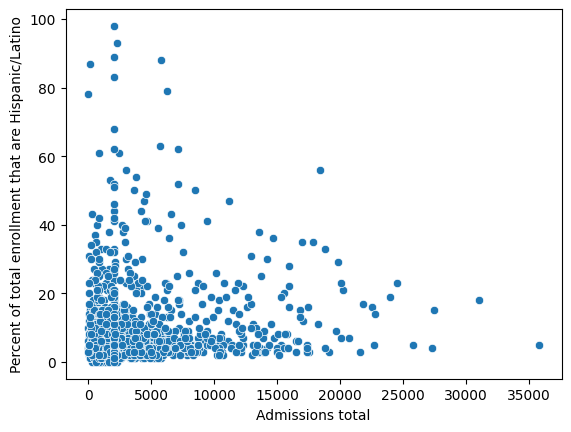

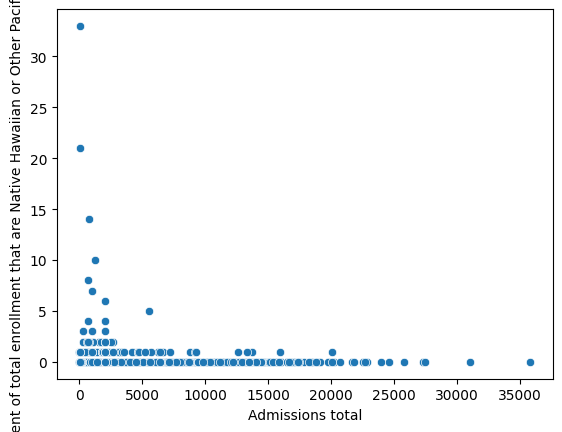

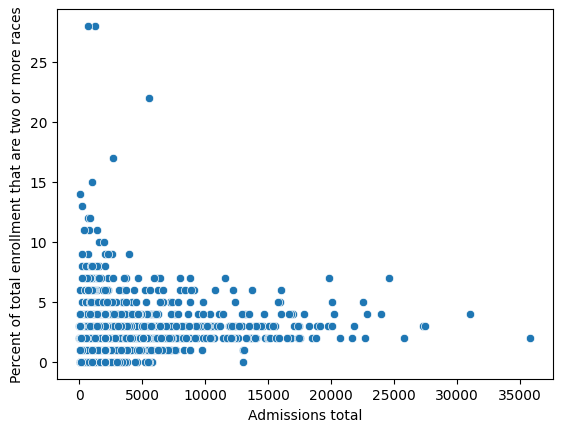

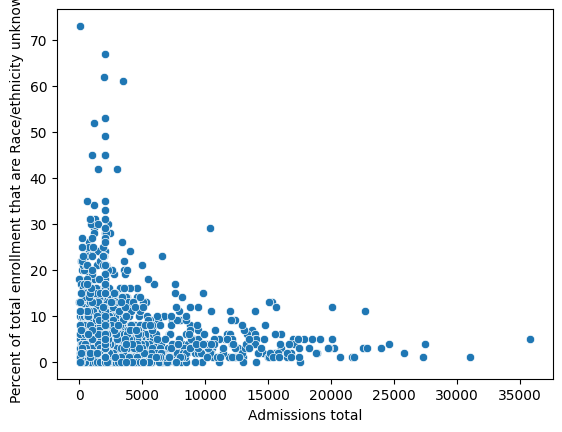

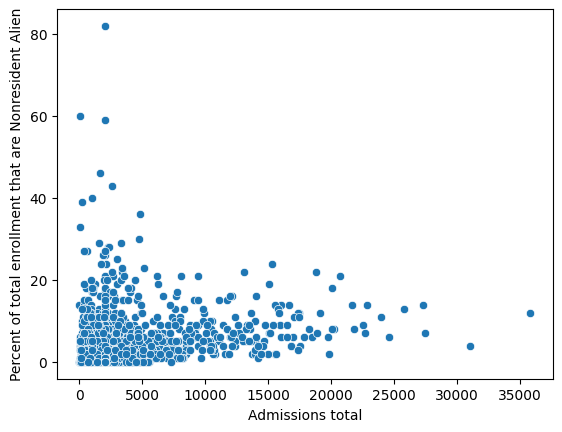

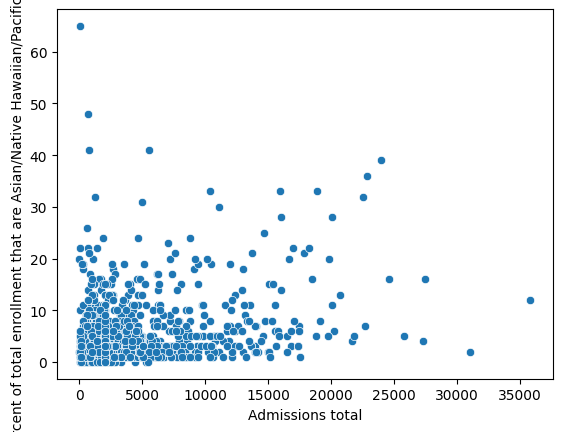

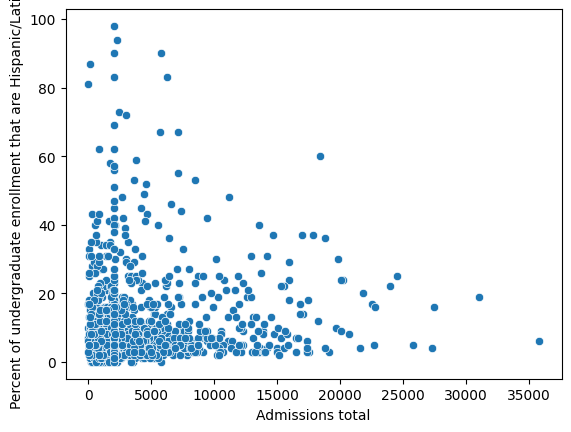

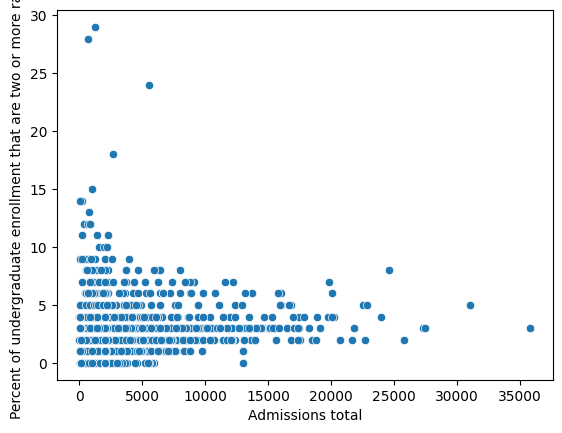

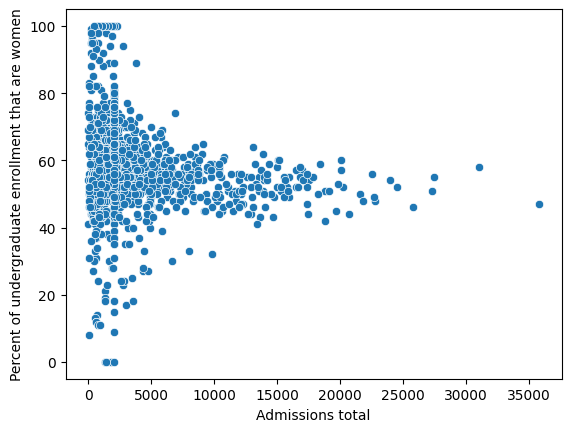

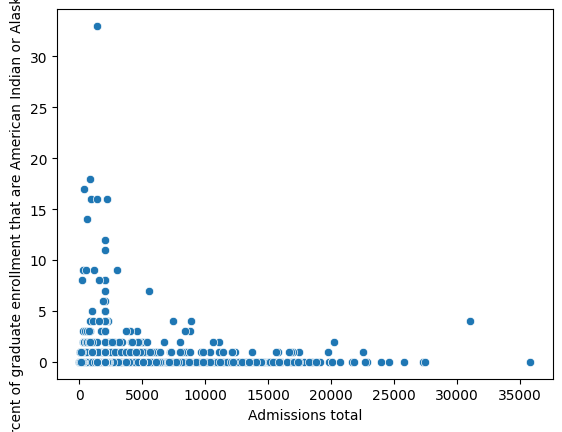

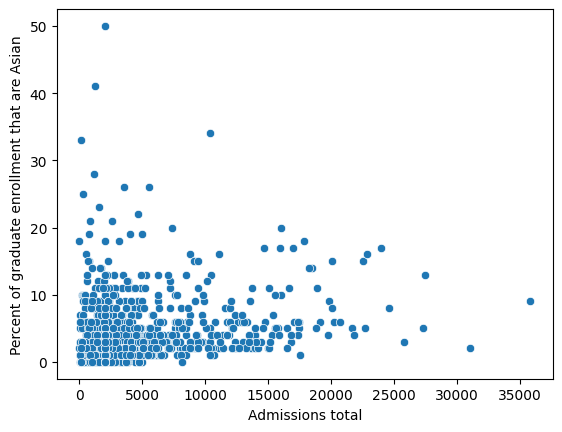

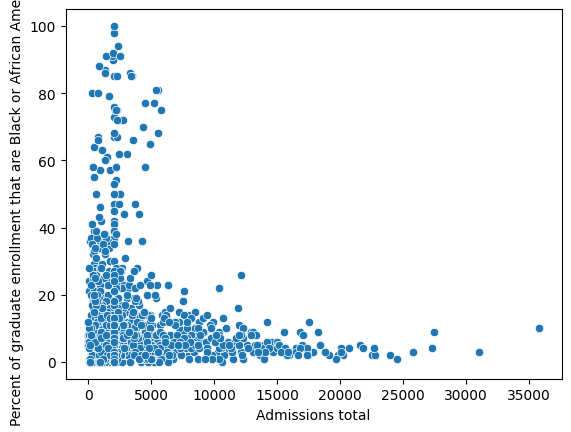

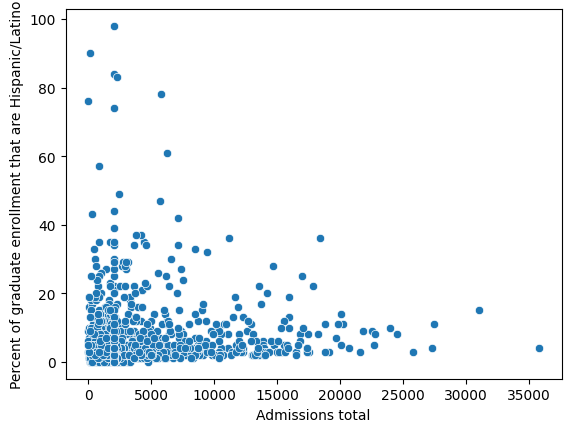

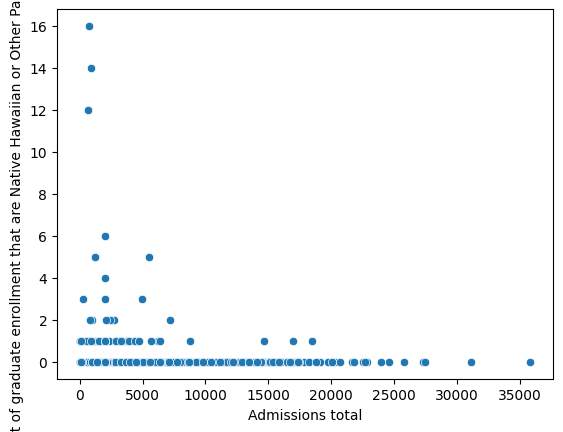

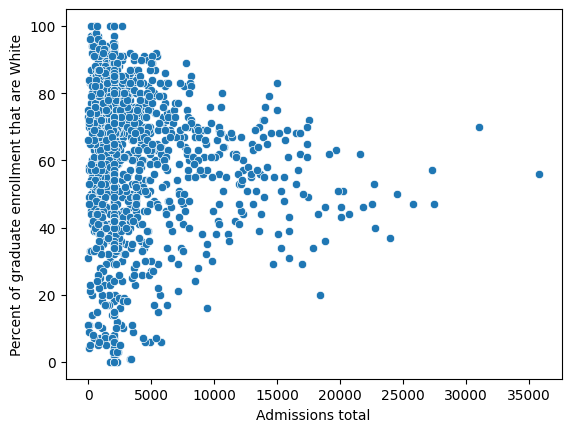

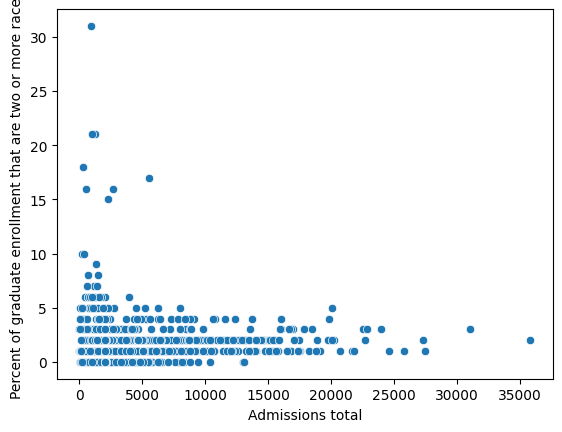

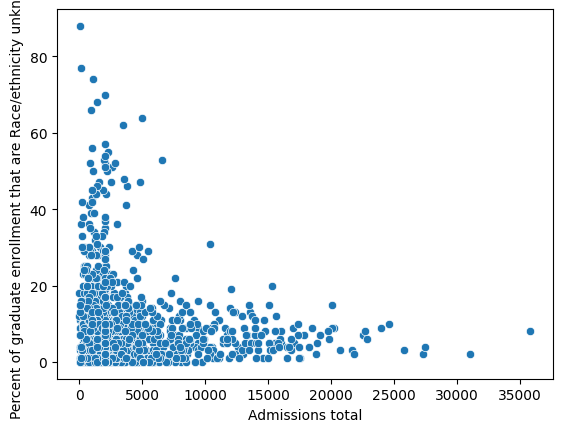

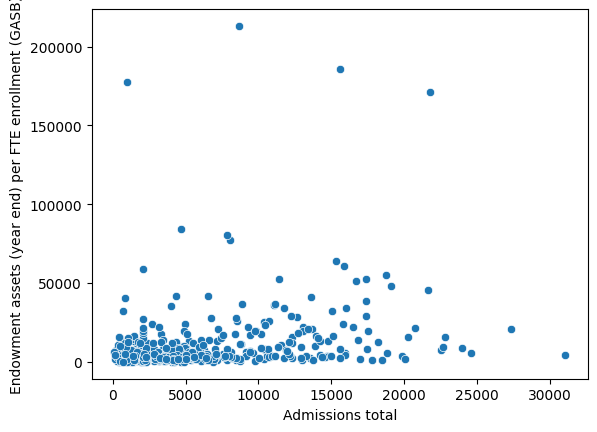

In [83]:
for i in data.columns:
    if 'enrollment' in i.lower():
        sns.scatterplot(data= data ,x=data['Admissions total'],y= data[i])
        plt.show()

***3.     
Do
students prefer public or private universities?***

In [84]:
data['Control of institution'].isna().sum()

0

In [85]:
data['Control of institution'].value_counts()

Control of institution
Private not-for-profit    971
Public                    563
Name: count, dtype: int64

In [86]:
sns.barplot(data= data , x= data['Control of institution'] , y=data['all students'])
plt.show()

so students prefer public university

***4.     
Do
students prefer universities with low tuition and fees***

In [87]:
data['Tuition and fees, 2010-11'].isna().sum()

44

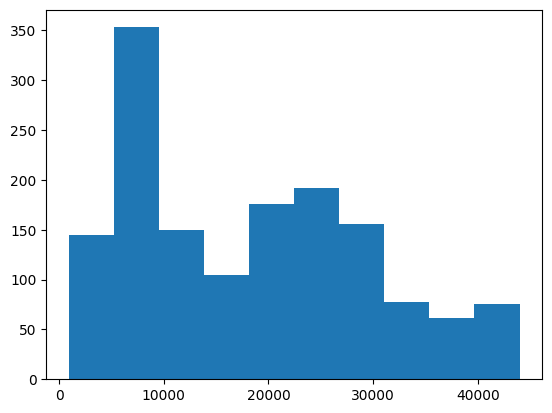

18355.520805369128
18000.0
0    7380.0
Name: Tuition and fees, 2010-11, dtype: float64


In [88]:
plt.hist(data['Tuition and fees, 2010-11'])
plt.show()
print(data['Tuition and fees, 2010-11'].mean())
print(data['Tuition and fees, 2010-11'].median())
print(data['Tuition and fees, 2010-11'].mode())

In [89]:
data['Tuition and fees, 2010-11']=data['Tuition and fees, 2010-11'].fillna(data['Tuition and fees, 2010-11'].median())

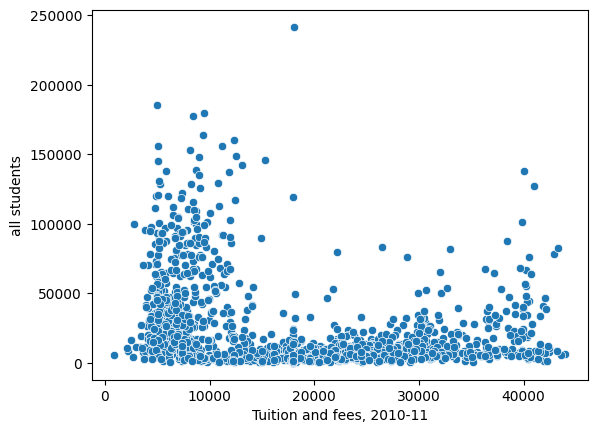

In [90]:
sns.scatterplot(data= data , x= data['Tuition and fees, 2010-11'] , y= data['all students'])
plt.show()

there is no relation but in 10000 there is the most numbers of students

In [91]:
data['Tuition and fees, 2011-12'].isna().sum()

44

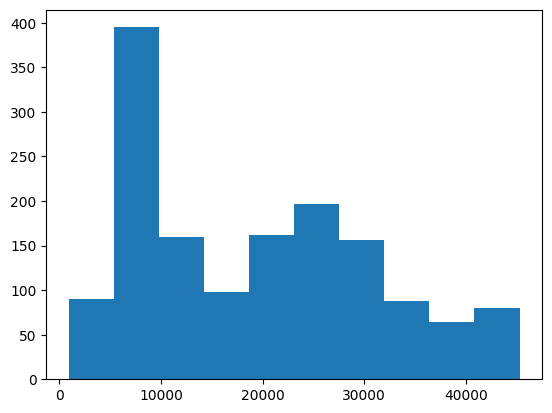

19243.977181208054
18765.0
0    7560.0
Name: Tuition and fees, 2011-12, dtype: float64


In [92]:
plt.hist(data['Tuition and fees, 2011-12'])
plt.show()
print(data['Tuition and fees, 2011-12'].mean())
print(data['Tuition and fees, 2011-12'].median())
print(data['Tuition and fees, 2011-12'].mode())

In [93]:
data['Tuition and fees, 2011-12']=data['Tuition and fees, 2011-12'].fillna(data['Tuition and fees, 2011-12'].median())

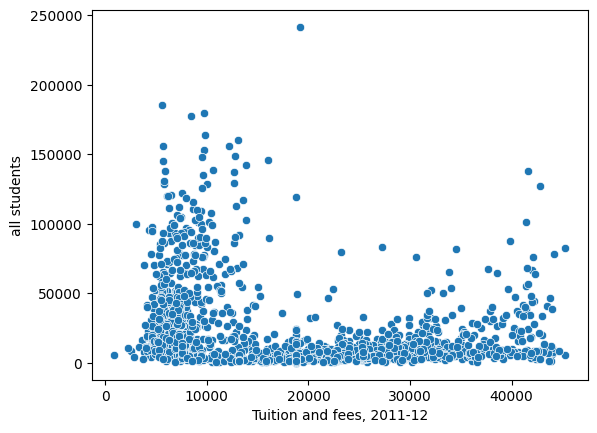

In [94]:
sns.scatterplot(data= data , x= data['Tuition and fees, 2011-12'] , y= data['all students'])
plt.show()

there is no relation but in 10000 there is the most numbers of students

In [95]:
data['Tuition and fees, 2013-14'].isna().sum()

37

In [96]:
data['Tuition and fees, 2013-14']=data['Tuition and fees, 2013-14'].fillna(data['Tuition and fees, 2013-14'].median())

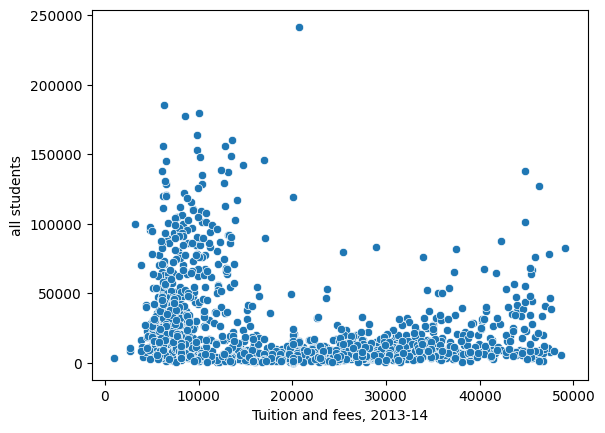

In [97]:
sns.scatterplot(data= data , x= data['Tuition and fees, 2013-14'] , y= data['all students'])
plt.show()

***5.     
Do
students prefer a university for its low on-campus cost of living?***

In [98]:
data['Total price for in-state students living on campus 2013-14'].isna().sum()

134

In [99]:
data['Total price for in-state students living on campus 2013-14'].value_counts()

Total price for in-state students living on campus 2013-14
20100.0    4
30840.0    4
41461.0    3
35500.0    3
30070.0    2
          ..
24762.0    1
58578.0    1
61502.0    1
48830.0    1
38602.0    1
Name: count, Length: 1350, dtype: int64

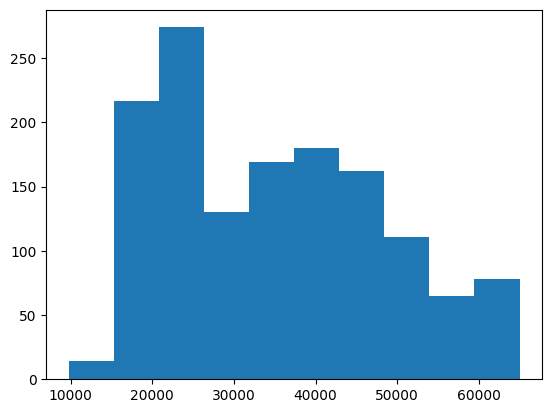

34935.30642857143
34115.0
0    20100.0
1    30840.0
Name: Total price for in-state students living on campus 2013-14, dtype: float64


In [100]:
plt.hist(data['Total price for in-state students living on campus 2013-14'])
plt.show()
print(data['Total price for in-state students living on campus 2013-14'].mean())
print(data['Total price for in-state students living on campus 2013-14'].median())
print(data['Total price for in-state students living on campus 2013-14'].mode())

In [101]:
data['Total price for in-state students living on campus 2013-14']=data['Total price for in-state students living on campus 2013-14'].fillna(data['Total price for in-state students living on campus 2013-14'].median())

In [102]:
sns.scatterplot(data= data , x= data['Total price for in-state students living on campus 2013-14'] , y= data['all students'])
plt.show()

in the low cost more student choose it may when it less than 40000 but there is some student that prefer 60000

In [103]:
data['Total price for out-of-state students living on campus 2013-14'].value_counts()

Total price for out-of-state students living on campus 2013-14
20100.0    4
37902.0    4
35500.0    3
41461.0    3
36676.0    2
          ..
29960.0    1
42920.0    1
36336.0    1
58578.0    1
38602.0    1
Name: count, Length: 1343, dtype: int64

In [104]:
data['Total price for out-of-state students living on campus 2013-14'].isna().sum()

134

In [105]:
data['Total price for out-of-state students living on campus 2013-14']=data['Total price for out-of-state students living on campus 2013-14'].fillna(data['Total price for out-of-state students living on campus 2013-14'].median())

In [106]:
sns.scatterplot(data= data , x= data['Total price for out-of-state students living on campus 2013-14'] , y= data['all students'])
plt.show()

may be no relation but out of living student also beening pefore 40000 more than the more of it

***6.     
Do
students prefer universities from highly populated states?***

In [107]:
heigh_populated_state_university = [i for i in data['Name'] if 'Indiana ' in i]

In [108]:
data['heigh_populated_university']=data['Name'].isin(heigh_populated_state_university)

In [109]:
data['heigh_populated_university'].value_counts()

heigh_populated_university
False    1523
True       11
Name: count, dtype: int64

In [110]:
data['heigh_populated_university']

0       False
1       False
2       False
3       False
4       False
        ...  
1529    False
1530    False
1531    False
1532    False
1533    False
Name: heigh_populated_university, Length: 1534, dtype: bool

In [120]:
sns.barplot(data= data , x= data['heigh_populated_university'] , y= data['all students'])
plt.show()

so that mean students prefere indian university that is highly populated states

***7.     
Do
students prefer a university because it belongs to a state with a high GDP per
capita?***

In [121]:
heighGPD =["New York", "Massachusetts", "Washington", "California", "Connecticut",
              "Alaska", "Delaware", "North Dakota", "Nebraska", "Colorado",
              "Texas", "Florida", "Illinois", "Virginia", "Minnesota"]

In [131]:
data['heighGPD'] = data['County name'].apply(lambda x: any(state.lower() in x.lower() for state in heighGPD))


In [132]:
data['heighGPD'].value_counts()

heighGPD
False    1487
True       47
Name: count, dtype: int64

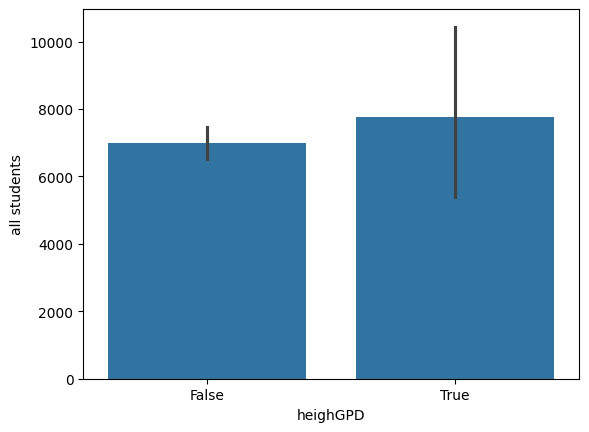

In [133]:
sns.barplot(data= data , x= data['heighGPD'] , y= data['all students'])
plt.show()

so yes student prefer university with heigh GDP but not with a big difference

***8 .
Do
students prefer a university based on the possibility of a higher, additional
academic degree in the same university?***

In [138]:
data['Offers Doctor\'s degree - research/scholarship'].value_counts()

Offers Doctor's degree - research/scholarship
Implied no    1021
Yes            511
Name: count, dtype: int64

In [139]:
data['Offers Doctor\'s degree - research/scholarship'].isna().sum()

2

In [140]:
data['Offers Doctor\'s degree - research/scholarship']=data['Offers Doctor\'s degree - research/scholarship'].fillna(data['Offers Doctor\'s degree - research/scholarship'].mode())

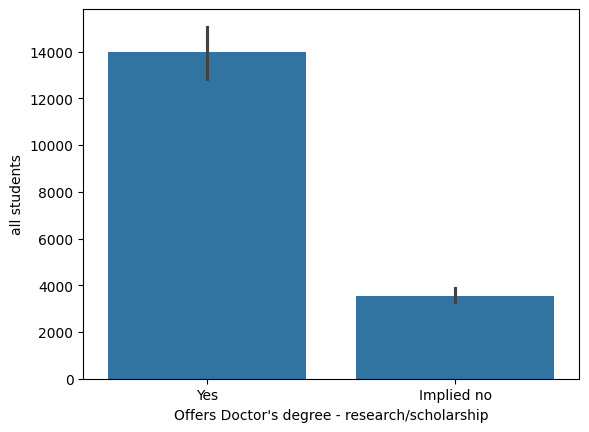

In [141]:
sns.barplot(data= data , x= data['Offers Doctor\'s degree - research/scholarship'] , y= data['all students'])
plt.show()

In [134]:
data['Offers Doctor\'s degree - professional practice'].value_counts()

Offers Doctor's degree - professional practice
Implied no    1097
Yes            435
Name: count, dtype: int64

In [135]:
data['Offers Doctor\'s degree - professional practice'].isna().sum()

2

In [136]:
data['Offers Doctor\'s degree - professional practice']=data['Offers Doctor\'s degree - professional practice'].fillna(data['Offers Doctor\'s degree - professional practice'].mode())

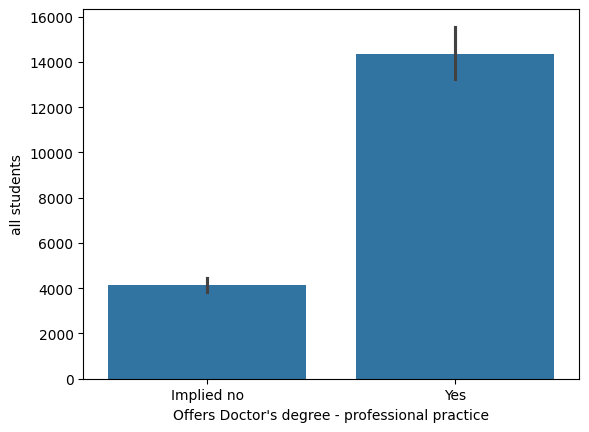

In [137]:
sns.barplot(data= data , x= data['Offers Doctor\'s degree - professional practice'] , y= data['all students'])
plt.show()

so yes student prefer the university that offers of a higher, additional
academic degree in the same university